In [175]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# %% Parameters
k = 10  # erg/cm2
x0 = 3  # cm, it is the equilibrium length of the spring
m1 = 10  # g
m2 = 12  # g
simulation_time = 15

# %% Initial Conditions
x1_0 = 2  # cm
x2_0 = 6  # cm
v1_0 = 0  # cm/s
v2_0 = 0  # cm/s
F_initial = k * (x2_0 - x1_0 - x0)  # g * (cm/s^2)

In [177]:
# %% Velocity Verlet algorithm
def verlet_algo(simulation_time, dt, x0, x1_0, x2_0, v1_0, v2_0, F_initial):
    time = np.arange(0, simulation_time + dt, dt)

    x1 = [x1_0]
    x2 = [x2_0]
    v1 = [v1_0]
    v2 = [-v2_0]  # the negative sign is because the direction is opposite

    F = [F_initial]
    a1 = [F_initial / m1]
    a2 = [F_initial / m2]

    U = [1/2 * k * (x2[0] - x1[0] - x0)**2]
    energy_kinetic_1 = [1/2 * m1 * v1_0**2]
    energy_kinetic_2 = [1/2 * m2 * v2_0**2]

    total_energy = [U[0] + energy_kinetic_1[0] + energy_kinetic_2[0]]

    for i in range(len(time) - 1):
        curr = i
        next = i+1
        
        # получим следующие координаты
        x1.append(x1[curr] + v1[curr]*dt + a1[curr] * (dt**2)/2)
        x2.append(x2[curr] + v2[curr]*dt - a2[curr] * (dt**2)/2)

        # получим следующие значения силы и ускорений из следующих координат
        F.append(k * (x2[next] - x1[next] - x0))
        a1.append(F[next] / m1)
        a2.append(F[next] / m2)

        # получим следующие значения скоростей (РАЗЛИЧИЕ ЗДЕСЬ!)
        v1.append(v1[curr] + ((a1[curr] + a1[next])*dt)/2)
        v2.append(v2[curr] - ((a2[curr] + a2[next])*dt)/2)

        # получим следующее значение потенциала
        U.append(1/2 * k * (x2[next] - x1[next] - x0)**2)

        # получим следующие значения кинетических энергий частиц
        energy_kinetic_1.append(m1 * (v1[next]**2) / 2)
        energy_kinetic_2.append(m2 * (v2[next]**2) / 2)

        # получим следующее значение полной энергии системы (почему потенциал берем один раз?)
        total_energy.append(U[next] + energy_kinetic_1[next] + energy_kinetic_2[next])

    return x1, x2, v1, v2, F, time, U, energy_kinetic_1, energy_kinetic_2, total_energy
    #      #0  #1  #2  #3  #4  #5   #6        #7                #8              #9

def euler_algo(simulation_time, dt, x0, x1_0, x2_0, v1_0, v2_0, F_initial):
    time = np.arange(0, simulation_time + dt, dt)

    x1 = [x1_0]
    x2 = [x2_0]
    v1 = [v1_0]
    v2 = [-v2_0]

    F = [F_initial]
    a1 = [F_initial / m1]
    a2 = [F_initial / m2]

    U = [1/2 * k * (x2[0] - x1[0] - x0)**2]
    energy_kinetic_1 = [1/2 * m1 * v1_0**2]
    energy_kinetic_2 = [1/2 * m2 * v2_0**2]

    total_energy = [U[0] + energy_kinetic_1[0] + energy_kinetic_2[0]]

    for i in range(len(time) - 1):
        curr = i
        next = i+1
        
        # получим следующие координаты
        x1.append(x1[curr] + v1[curr]*dt + a1[curr] * (dt**2)/2)
        x2.append(x2[curr] + v2[curr]*dt - a2[curr] * (dt**2)/2)

        # получим следующие значения силы и ускорений из следующих координат
        F.append(k * (x2[next] - x1[next] - x0))
        a1.append(F[next] / m1)
        a2.append(F[next] / m2)

        # получим следующие значения скоростей (РАЗЛИЧИЕ ЗДЕСЬ!)
        v1.append(v1[curr] + a1[curr]*dt)
        v2.append(v2[curr] - a2[curr]*dt)

        # получим следующее значение потенциала
        U.append(1/2 * k * (x2[next] - x1[next] - x0)**2)

        # получим следующие значения кинетических энергий частиц
        energy_kinetic_1.append(m1 * (v1[next]**2) / 2)
        energy_kinetic_2.append(m2 * (v2[next]**2) / 2)

        # получим следующее значение полной энергии системы (почему потенциал берем один раз?)
        total_energy.append(U[i + 1] + energy_kinetic_1[i + 1] + energy_kinetic_2[i + 1])

    return x1, x2, v1, v2, F, time, U, energy_kinetic_1, energy_kinetic_2, total_energy
    #      #0  #1  #2  #3  #4  #5   #6       #7                #8               #9

# Verlet

In [178]:
# %% 4) Make plots of the particle coordinates and velocities versus time based on the simulation results.
delta_t = 0.01

data = verlet_algo(simulation_time, delta_t, x0, x1_0, x2_0, v1_0, v2_0, F_initial)

time = data[5]

x1_verlet = data[0]
x2_verlet = data[1]

v1_verlet = data[2]
v2_verlet = data[3]

total_energy_verlet = data[9]
U_verlet = data[6]
energy_kinetic1_verlet = data[7]
energy_kinetic2_verlet = data[8]

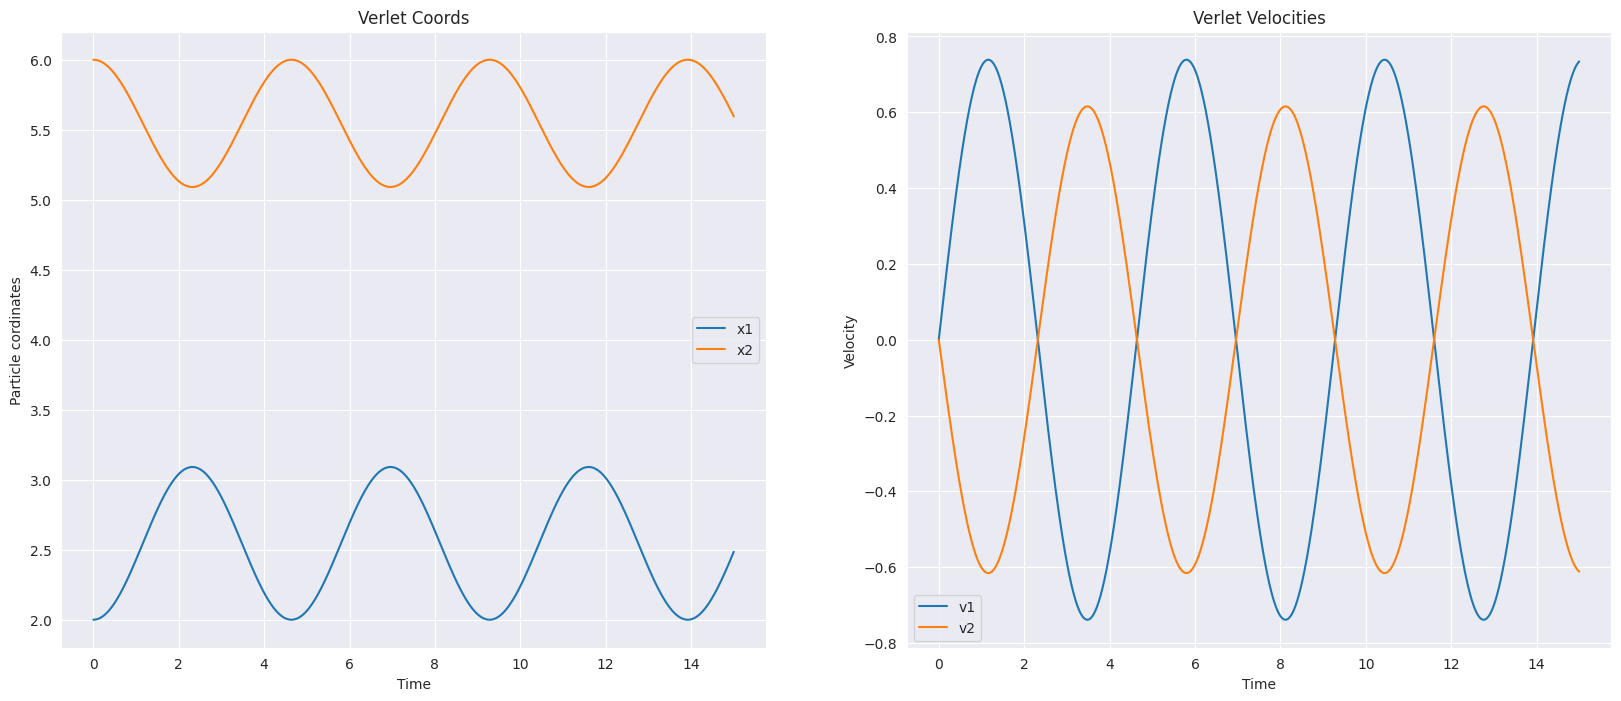

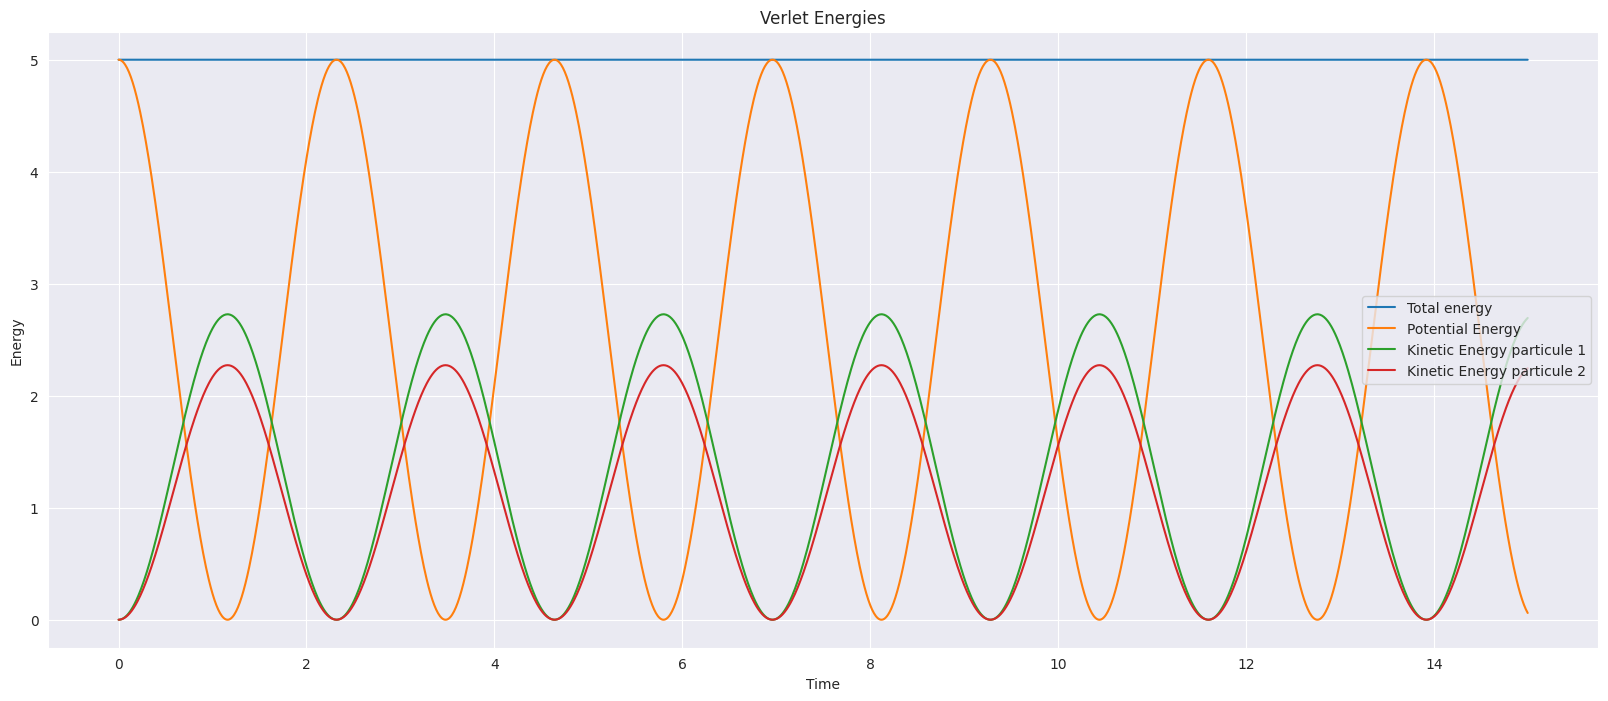

In [179]:
_, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=x1_verlet,
    ax=axes[0],
    label='x1',
)
sns.lineplot(
    x=time,
    y=x2_verlet,
    ax=axes[0],
    label='x2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Particle cordinates')
plot.set_title("Verlet Coords")

plot = sns.lineplot(
    x=time,
    y=v1_verlet,
    ax=axes[1],
    label='v1',
)
sns.lineplot(
    x=time,
    y=v2_verlet,
    ax=axes[1],
    label='v2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Velocity')
plot.set_title("Verlet Velocities")

_, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=total_energy_verlet,
    ax=ax,
    label='Total energy',
)
sns.lineplot(
    x=time,
    y=U_verlet,
    ax=ax,
    label='Potential Energy',
)
sns.lineplot(
    x=time,
    y=energy_kinetic1_verlet,
    ax=ax,
    label='Kinetic Energy particule 1',
)
sns.lineplot(
    x=time,
    y=energy_kinetic2_verlet,
    ax=ax,
    label='Kinetic Energy particule 2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Energy')
plot.set_title("Verlet Energies");

# Euler

In [180]:
delta_t = 0.01

data = euler_algo(simulation_time, delta_t, x0, x1_0, x2_0, v1_0, v2_0, F_initial)

time = data[5]

x1_euler = data[0]
x2_euler = data[1]

v1_euler = data[2]
v2_euler = data[3]

total_energy_euler = data[9]
U_euler = data[6]
energy_kinetic1_euler = data[7]
energy_kinetic2_euler = data[8]

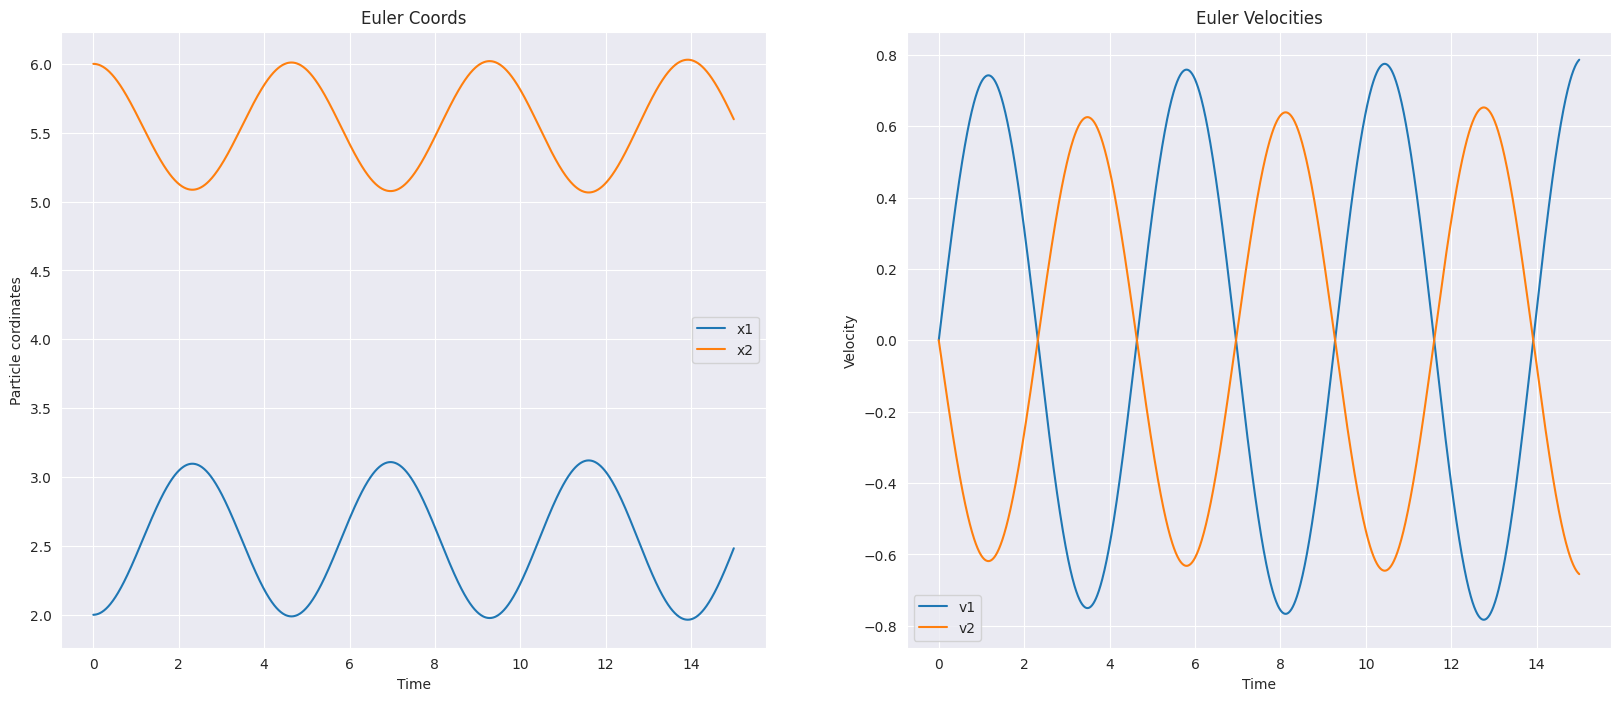

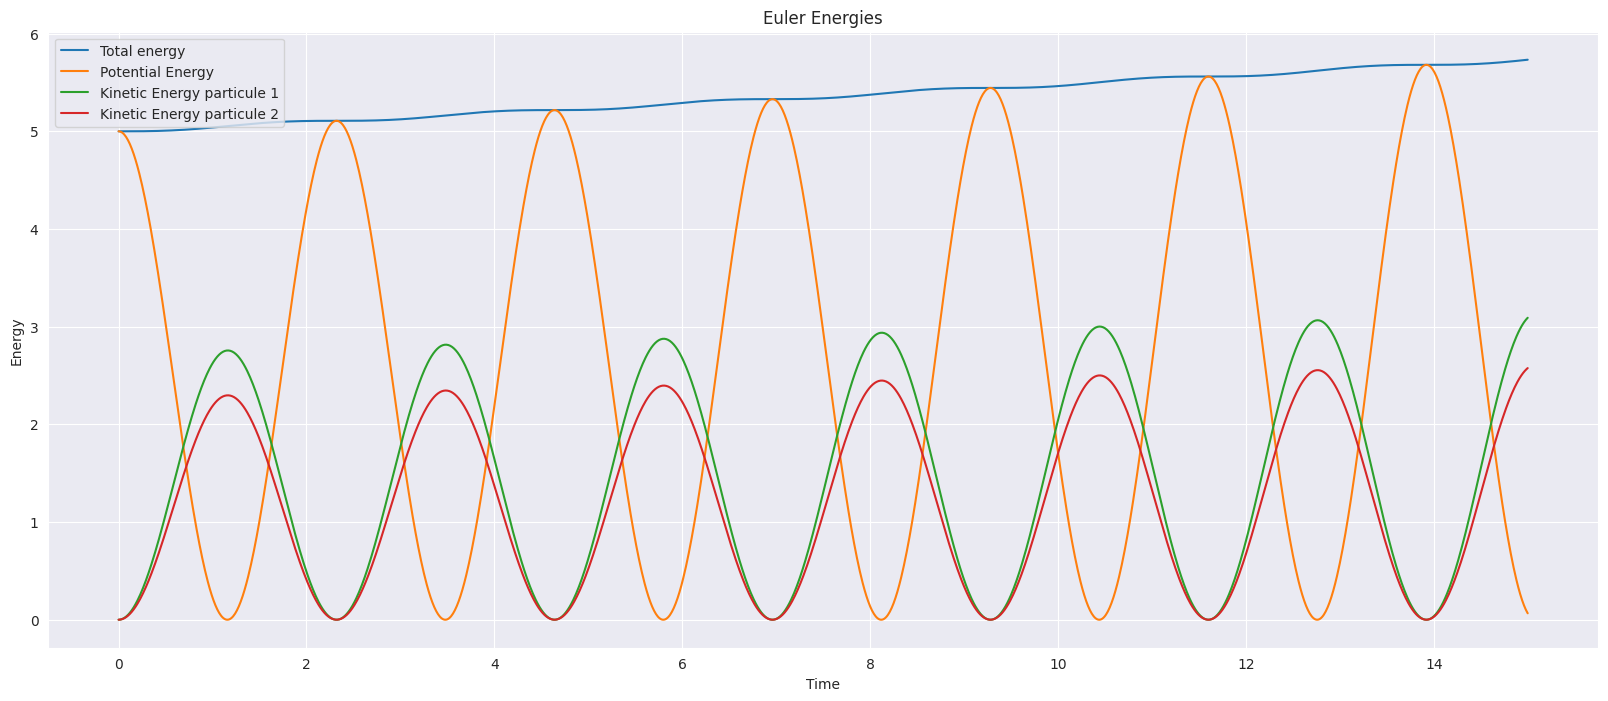

In [181]:
_, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=x1_euler,
    ax=axes[0],
    label='x1',
)
sns.lineplot(
    x=time,
    y=x2_euler,
    ax=axes[0],
    label='x2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Particle cordinates')
plot.set_title("Euler Coords")

plot = sns.lineplot(
    x=time,
    y=v1_euler,
    ax=axes[1],
    label='v1',
)
sns.lineplot(
    x=time,
    y=v2_euler,
    ax=axes[1],
    label='v2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Velocity')
plot.set_title("Euler Velocities")

_, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=total_energy_euler,
    ax=ax,
    label='Total energy',
)
sns.lineplot(
    x=time,
    y=U_euler,
    ax=ax,
    label='Potential Energy',
)
sns.lineplot(
    x=time,
    y=energy_kinetic1_euler,
    ax=ax,
    label='Kinetic Energy particule 1',
)
sns.lineplot(
    x=time,
    y=energy_kinetic2_euler,
    ax=ax,
    label='Kinetic Energy particule 2',
)
plot.set_xlabel('Time')
plot.set_ylabel('Energy')
plot.set_title("Euler Energies");

# Comparison

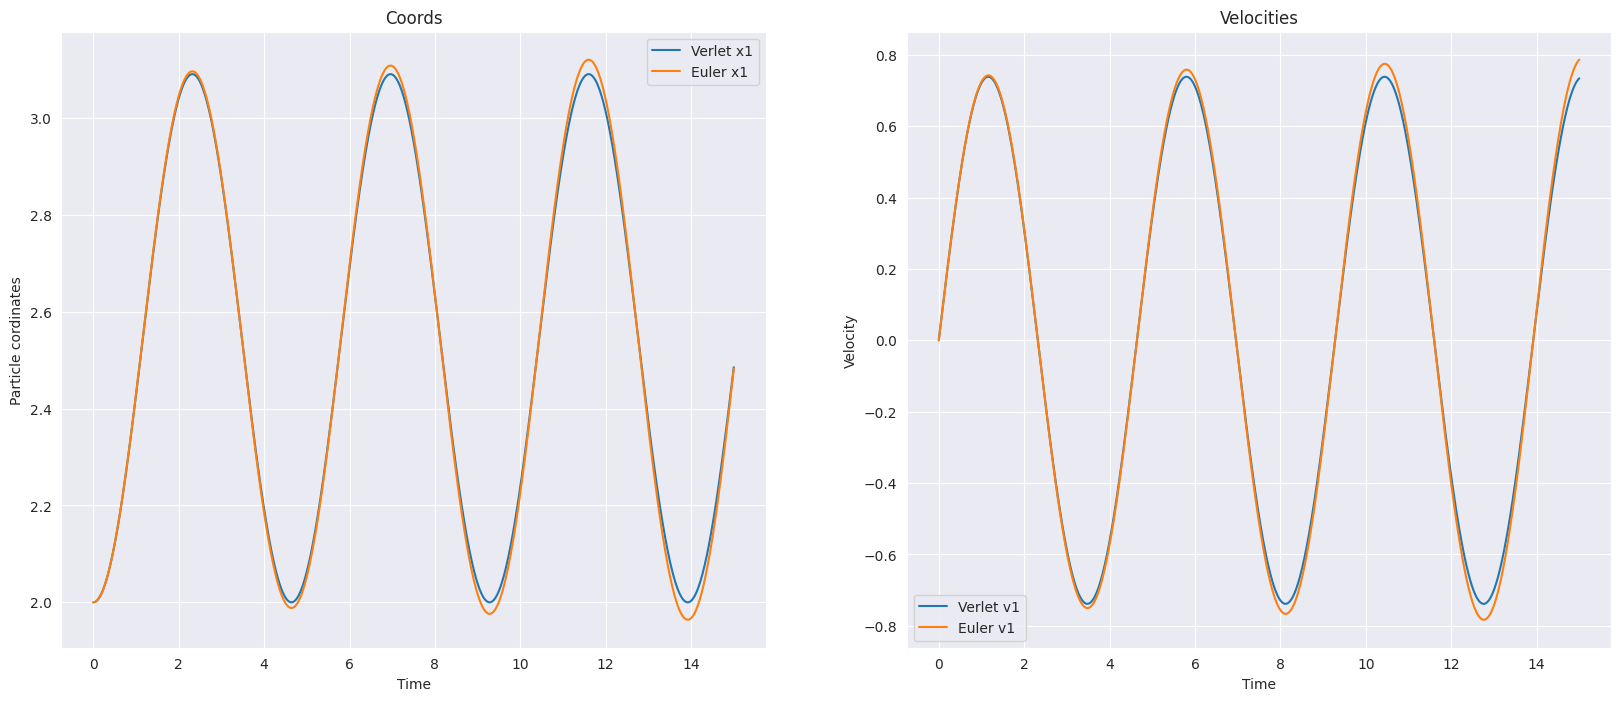

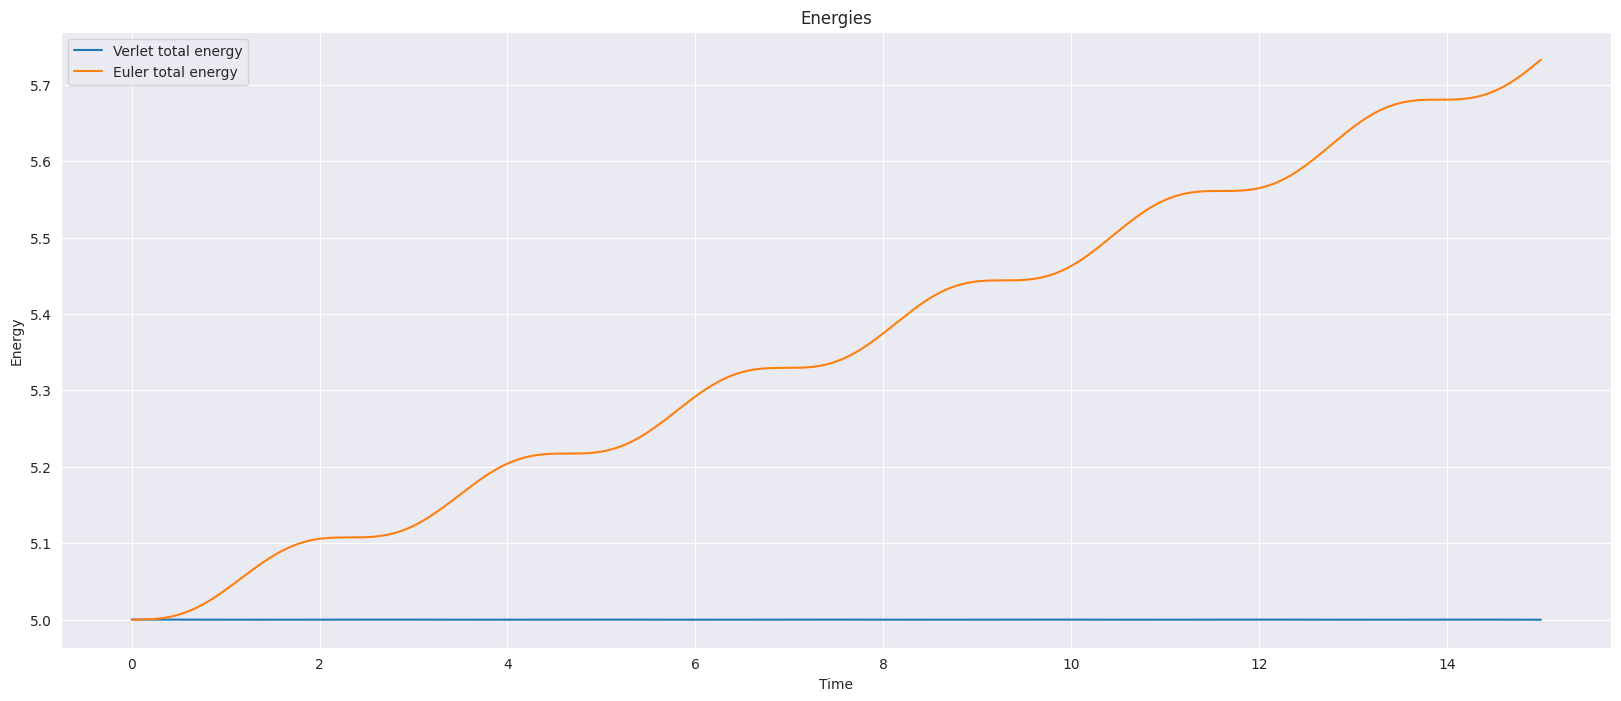

In [182]:
_, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=x1_verlet,
    ax=axes[0],
    label='Verlet x1',
)
sns.lineplot(
    x=time,
    y=x1_euler,
    ax=axes[0],
    label='Euler x1',
)
plot.set_xlabel('Time')
plot.set_ylabel('Particle cordinates')
plot.set_title("Coords")

plot = sns.lineplot(
    x=time,
    y=v1_verlet,
    ax=axes[1],
    label='Verlet v1',
)
sns.lineplot(
    x=time,
    y=v1_euler,
    ax=axes[1],
    label='Euler v1',
)
plot.set_xlabel('Time')
plot.set_ylabel('Velocity')
plot.set_title("Velocities")

_, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))

plot = sns.lineplot(
    x=time,
    y=total_energy_verlet,
    ax=ax,
    label='Verlet total energy',
)
sns.lineplot(
    x=time,
    y=total_energy_euler,
    ax=ax,
    label='Euler total energy',
)
plot.set_xlabel('Time')
plot.set_ylabel('Energy')
plot.set_title("Energies");